In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/Users/devadeva/Desktop/MNIT/Machine Learning/Potato-Disease Classification/New Datset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="/Users/devadeva/Desktop/MNIT/Machine Learning/Potato-Disease Classification/Augumented Images"
)

Found 1506 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [14]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.7049226  0.701001   0.76374614]
  [0.7096119  0.7056903  0.7684354 ]
  [0.6725101  0.6685885  0.7313336 ]
  ...
  [0.43743634 0.42175004 0.4805736 ]
  [0.4902267  0.4745404  0.53336394]
  [0.49419993 0.47851366 0.5373372 ]]

 [[0.6993272  0.6954056  0.7581507 ]
  [0.70313275 0.6992112  0.7619563 ]
  [0.6684627  0.6645411  0.7272862 ]
  ...
  [0.36134088 0.3456546  0.40447816]
  [0.48515797 0.4694717  0.5282952 ]
  [0.49430975 0.47862348 0.53744704]]

 [[0.6090416  0.60512    0.6678651 ]
  [0.6095986  0.605677   0.6684221 ]
  [0.6118983  0.60797673 0.6707218 ]
  ...
  [0.4641865  0.44850022 0.5073237 ]
  [0.45756787 0.4418816  0.5007051 ]
  [0.45682383 0.44113755 0.49996108]]

 ...

 [[0.6866589  0.68273735 0.7376393 ]
  [0.693426   0.68950444 0.7444064 ]
  [0.77630824 0.77238667 0.8272886 ]
  ...
  [0.4917944  0.48395127 0.5388532 ]
  [0.48094687 0.47310373 0.52800566]
  [0.5710087  0.56316555 0.6180675 ]]

 [[0.69776714 0.69384557 0.7487475 ]
  [0.7005405  0.6966189  0.7515209 ]


In [18]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/Users/devadeva/Desktop/MNIT/Machine Learning/Potato-Disease Classification/New Datset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/Users/devadeva/Desktop/MNIT/Machine Learning/Potato-Disease Classification/New Datset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [22]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.44089845 0.42977342 0.49612024]
  [0.43766257 0.42746207 0.49334663]
  [0.4344267  0.42515072 0.49057302]
  ...
  [0.622604   0.61868244 0.68142754]
  [0.6475087  0.6435871  0.7063322 ]
  [0.6117647  0.60784316 0.67122793]]

 [[0.503902   0.49213728 0.558804  ]
  [0.4960434  0.4842787  0.5509454 ]
  [0.48818484 0.47642013 0.5430868 ]
  ...
  [0.6263021  0.62238055 0.68512565]
  [0.64288604 0.6389645  0.70170957]
  [0.6117647  0.60784316 0.67215246]]

 [[0.6126685  0.6009038  0.66757053]
  [0.5992627  0.587498   0.6541647 ]
  [0.5858569  0.5740922  0.6407589 ]
  ...
  [0.6300003  0.6260787  0.6888238 ]
  [0.63826334 0.6343418  0.6970869 ]
  [0.6117647  0.60784316 0.673077  ]]

 ...

 [[0.5456634  0.54155344 0.62266195]
  [0.49061632 0.48277318 0.5651262 ]
  [0.4168633  0.40902016 0.4913731 ]
  ...
  [0.6051718  0.60909337 0.68752474]
  [0.6019359  0.6058575  0.68428886]
  [0.59870005 0.6026216  0.681053  ]]

 [[0.5498239  0.5443271  0.6258978 ]
  [0.4790596  0.47121647 0.55356944]


In [24]:
#MODEL Building

In [26]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
1506/32

47.0625

In [34]:
215/32

6.71875

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 852ms/step - accuracy: 0.5052 - loss: 0.9405 - val_accuracy: 0.4583 - val_loss: 0.9929
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 34s 739ms/step - accuracy: 0.4688 - loss: 0.9874

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.4688 - loss: 0.9874 - val_accuracy: 0.4792 - val_loss: 0.9856
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 848ms/step - accuracy: 0.4816 - loss: 0.9300 - val_accuracy: 0.4740 - val_loss: 0.8714
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5312 - loss: 0.9048 - val_accuracy: 0.4688 - val_loss: 0.8812
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 812ms/step - accuracy: 0.5828 - loss: 0.8312 - val_accuracy: 0.7292 - val_loss: 0.6455
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.7812 - loss: 0.6167 - val_accuracy: 0.7760 - val_loss: 0.5578
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 870ms/step - accuracy: 0.8007 - loss: 0.4906 - val_accuracy: 0.8438 - val_loss: 0.4224
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8438 - loss: 0.3346 - val_accuracy: 0.6927 - val_loss: 0.5793
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 965ms/step - accuracy: 0.7960 - loss: 0.4874 - val_accuracy: 0.8802 - val_

In [38]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.9440 - loss: 0.1558


In [40]:
scores

[0.18952244520187378, 0.9373549818992615]

In [42]:
history

In [44]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [48]:
type(history.history['loss'])

list

In [50]:
len(history.history['loss'])

20

In [52]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9240597486495972,
 0.9873784780502319,
 0.9099727869033813,
 0.9048371315002441,
 0.7885972261428833]

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [56]:
val_acc

[0.4583333432674408,
 0.4791666567325592,
 0.4739583432674408,
 0.46875,
 0.7291666865348816,
 0.7760416865348816,
 0.84375,
 0.6927083134651184,
 0.8802083134651184,
 0.859375,
 0.921875,
 0.8854166865348816,
 0.6822916865348816,
 0.859375,
 0.9375,
 0.9322916865348816,
 0.9739583134651184,
 0.9635416865348816,
 0.953125,
 0.9427083134651184]

In [58]:
acc

[0.524423360824585,
 0.46875,
 0.501356840133667,
 0.53125,
 0.6322931051254272,
 0.78125,
 0.8147897124290466,
 0.84375,
 0.8303934931755066,
 0.875,
 0.9226594567298889,
 1.0,
 0.9348710775375366,
 0.625,
 0.9192672967910767,
 1.0,
 0.9586160182952881,
 1.0,
 0.9715061187744141,
 1.0]

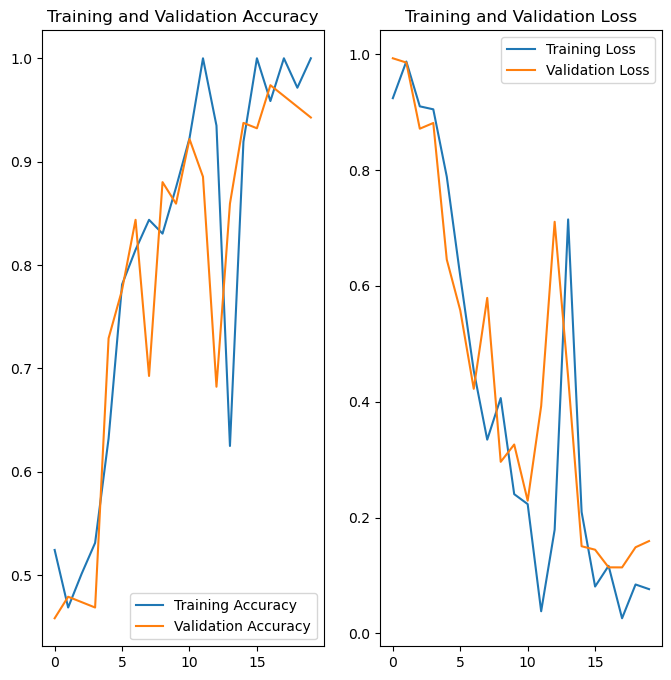

In [60]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
predicted label: Potato___Late_blight


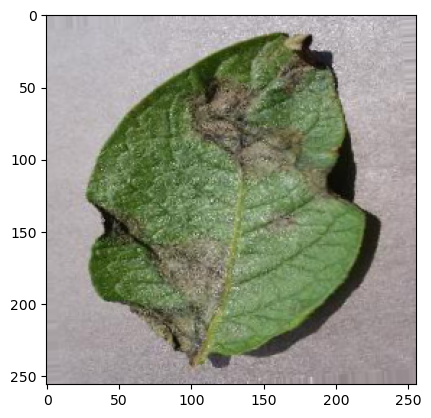

In [64]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [66]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


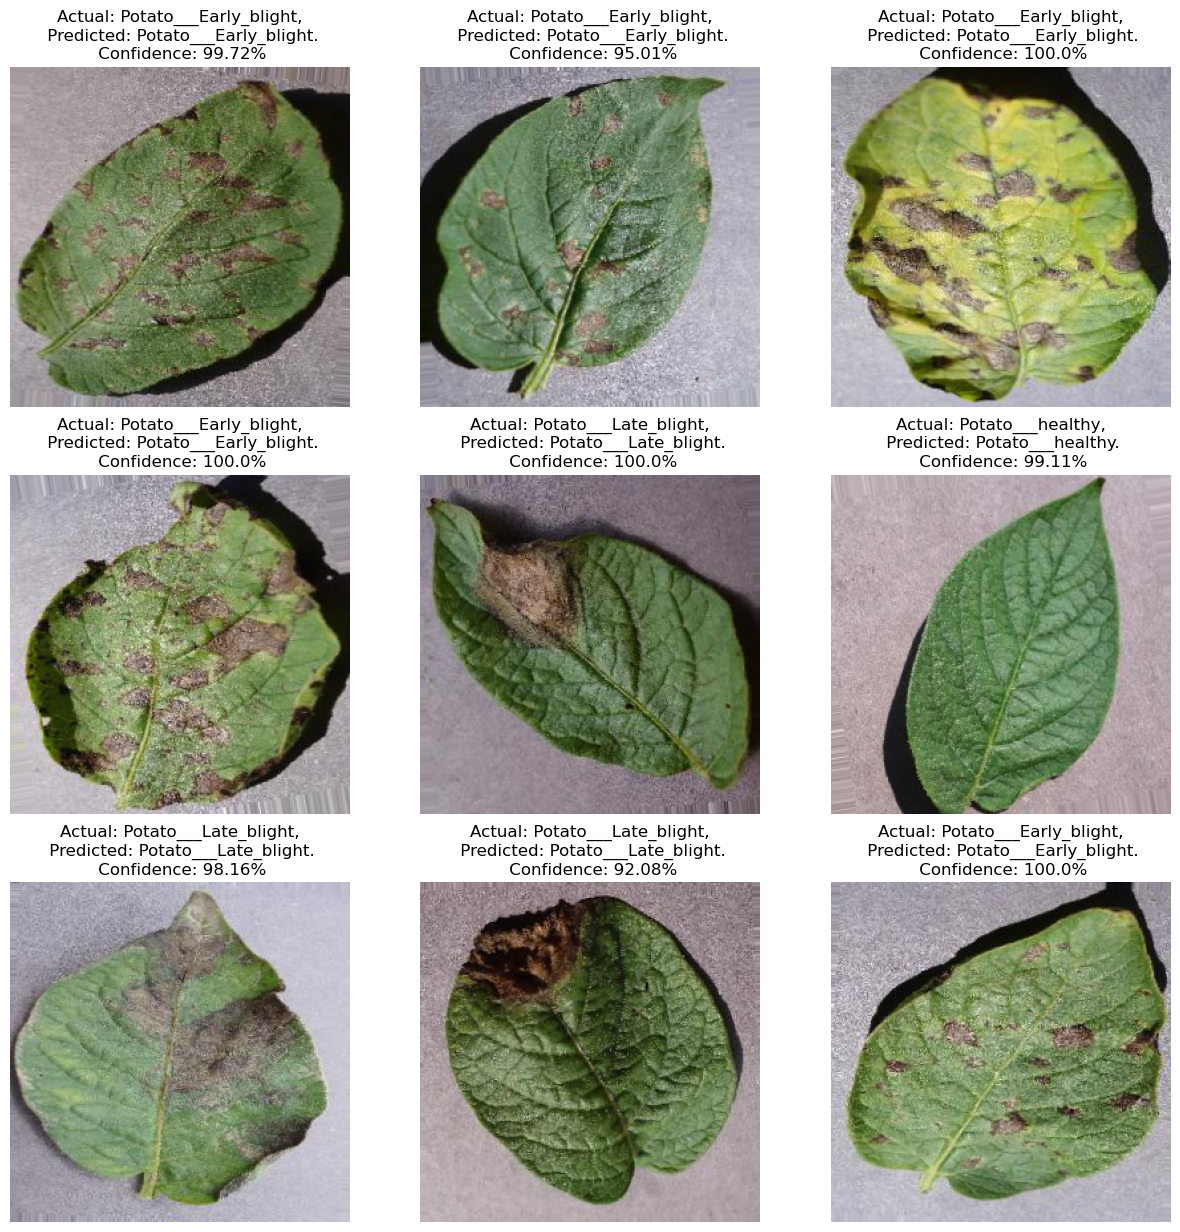

In [68]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [70]:
model.save("/Users/devadeva/Desktop/MNIT/Machine Learning/Potato-Disease Classification/Models/Image Generator Model/potatoes.h5")